# Digitale Darstellung von Farben und Bildern und wie man sie Manipuliert

## Einleitung

In diesem Notebook werden wir uns mit der digitalen Darstellung von Farben und Bildern beschäftigen. Wir werden uns mit den Grundlagen der digitalen Farbdarstellung und der Manipulation von Bildern befassen. Wir verwenden die Programmiersprache Python und einige ihrer Bibliotheken, um die Konzepte zu demonstrieren und mit ihnen zu experimentieren.

## Grundlagen

### Farben

Farben können auf verschiedene Arten dargestellt werden. Eine der gebräuchlichsten Methoden ist die Verwendung eines [RGB-Farbraums wie sRGB](https://en.wikipedia.org/wiki/SRGB). In diesem Farbraum wird jede Farbe durch eine Kombination von Rot, Grün und Blau dargestellt. Jede dieser Farben kann einen Intensitätswert zwischen 0 % und 100 % (bei 8 bit: 0-255) annehmen. Die Kombination dieser drei Farben in verschiedenen Verhältnissen ermöglicht die Darstellung einer Vielzahl von Farben.  
In Python können wir Farben im sRGB-Farbraum mit Hilfe von Tupeln darstellen. Jede Farbe wird durch ein Tupel dargestellt, das aus drei Werten besteht, die die Intensität von Rot, Grün und Blau darstellen. Zum Beispiel wird die Farbe Rot durch das Tupel (255, 0, 0) dargestellt, während die Farbe Grün durch das Tupel (0, 255, 0) dargestellt wird.

### Bilder im Computer

Bilder setzen sich aus einer Sammlung von Pixeln zusammen, die jeweils eine Farbe darstellen. In einem RGB-Bild besteht jedes Pixel aus drei Werten, die die Intensität von Rot, Grün und Blau darstellen. In Python können wir Bilder als 3D-Arrays (Stellen Sie sich eine dreidimensionale Tabelle vor) darstellen, wobei die ersten beiden Dimensionen die Höhe (y in negativrichtung) und Breite des Bildes darstellen und die dritte Dimension die Intensität von Rot, Grün und Blau, also `image[y, x, Farbkanal]`. Zum Beispiel kann ein 100x100 Pixel großes Bild als ein 3D-Array der Form (100, 100, 3) dargestellt werden.   
Um ein beliebiges Pixel in diesem Bild zu adressieren, können wir die Koordinaten des Pixels und die Farbkanäle verwenden. Zum Beispiel würde das Pixel in der oberen linken Ecke des Bildes die Koordinaten (0, 0) haben und die drei Farben des Pixels könnten durch das Array `image[0, 0]` abgerufen werden. Alternativ kann auch gleichzeitig auf die Farben zugegriffen werden, indem die Koordinaten und der Farbkanal angegeben werden, z.B. `image[0, 0, 0]` für den roten Kanal, `image[0, 0, 1]` für den grünen Kanal und `image[0, 0, 2]` für den blauen Kanal.


Als erstes importieren wir sogenannte Bibliotheken - das sind Sammlungen von Computer-Code der bereits von jemand anderem geschrieben wurde, und die wir verwenden können, vergleichbar mit den Funktionen ihres Taschenrechners (z.B. sin, cos, tan, sqrt, etc.). In diesem Fall verwenden wir die Bibliotheken `skimage`, `numpy` und `matplotlib`, um mit Bildern zu arbeiten und sie anzuzeigen.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io, data, color, img_as_float

Jetzt können wir schon loslegen! Als ersten laden wir ein Beispielbild aus der Bibliothek `skimage`. Die Bilddaten sind danach in der Variable `image` gespeichert. [Hier können Sie noch weitere Beispieldaten finden](https://scikit-image.org/docs/stable/api/skimage.data.html)

In [83]:
# Load a sample color image
image = data.astronaut()

Um das Bild anzuzeigen, benutzen wir die Funktion `imshow` aus der Bibliothek `matplotlib`. Die Funktion `imshow` zeigt das Bild an, das ihr als Argument übergeben wird.
Zusätzlich konfigurieren wir hier noch die Größe des Bildes, den Titel des Plots deaktivieren die Achsenbeschriftung.

(-0.5, 511.5, 511.5, -0.5)

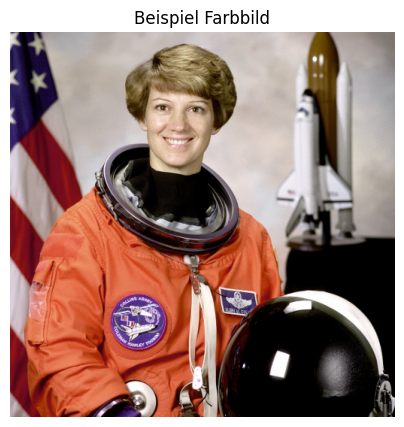

In [84]:
plt.figure(figsize=(12, 5))
plt.imshow(image)
plt.title("Beispiel Farbbild")
plt.axis('off')

Wie bereits diskutiert, ist das Bild also zusammengesetzt aus Pixeln, welche selbst eine Überlagerung einzelner Farbkanäle sind. Die Art der Farb- bzw Kontrastverläufe steuert die geometrische Information des Bildes, was einen Großteil der Gesamtinformation ausmacht.  
Dies können wir uns intuitiv klarmachen, wenn wir das selbe Bild in schwarz-weiß anzeigen. Dazu wird der Intensitätswert der Farbkanäle gewichtet zusammengerechnet und als Grauwert dargestellt (mit Summe der Koeffizienten = 1). 
Die konkrete Gewichtung hat mit der menschlichen Farbwahrnehmung zu tun, und ist in der Regel nicht gleichverteilt. In der Regel wird der grüne Kanal stärker gewichtet, da das menschliche Auge in diesem Bereich am empfindlichsten ist, in skimage ist die Gewichtung wie folgt definiert:  
Grauwert = 0.2125 R + 0.7154 G + 0.0721 B

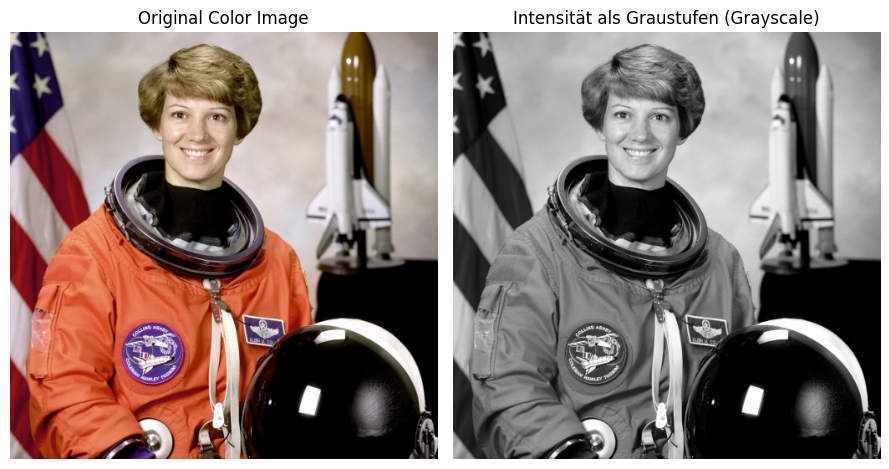

In [85]:
gray_image = color.rgb2gray(image)
# Creating side-by-side subplots for the color image and its grayscale version
plt.figure(figsize=(9, 5))
# Plotting the original color image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Color Image")
plt.axis('off')

# Plotting the grayscale representation
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Intensität als Graustufen (Grayscale)")
plt.axis('off')
plt.tight_layout()
plt.show()


Wir können das Bild in Graustufen einwandfrei wiedererkennen! Das heißt, kleinere Änderungen an den Farbkanälen haben nur geringe Auswirkungen auf die Wahrnehmung des Bildes.

Betrachten wir einmal die einzelnen Kanäle, so können wir erkennen, dass das Bild in den einzelnen Kanälen unterschiedlich aussieht. Das liegt daran, dass die Farbkanäle unterschiedliche Informationen enthalten. Betrachten Sie als Beispiel die Uniform der Astronautin in den einzelnen Kanälen. In dem roten Kanal ist die Uniform fast unsichtbar, während sie in dem blauen Kanal deutlich sichtbar ist.

Warum ist das so?

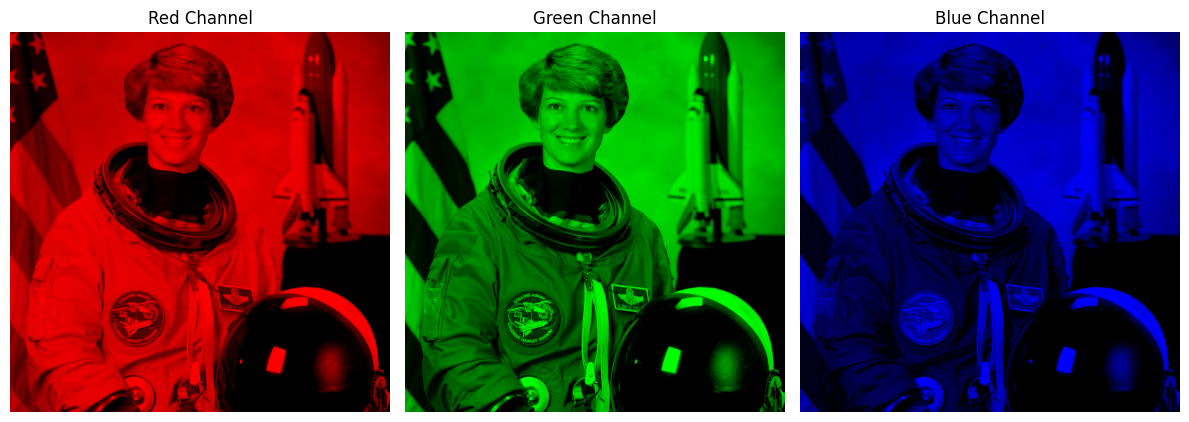

In [86]:
colors = ['Red', 'Green', 'Blue']
plt.figure(figsize=(12, 5))
for i, color in enumerate(colors, start=1):
    channel_image = np.zeros(image.shape, dtype="uint8")
    channel_image[:,:,i-1] = image[:,:,i-1]
    plt.subplot(1, 3, i)
    plt.imshow(channel_image)
    plt.title(f"{color} Channel")
    plt.axis('off')

plt.tight_layout()
plt.show()

Ein anderer Weg dies zu visualisieren ist, sich die Pixelwerte als "Höhe" in einem 3D-Plot vorzustellen. Die x- und y-Achsen entsprechen den Koordinaten des Pixels, und die z-Achse entspricht der Intensität des Farbkanals.  
Tun wir dies zuerst als Graustufenbild

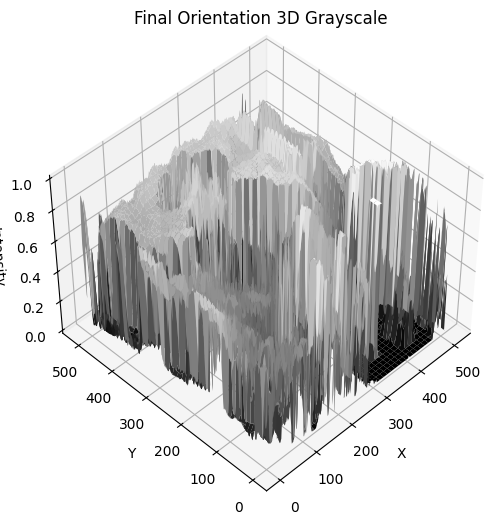

In [89]:
plt.figure(figsize=(8, 6))

Z = gray_image 
# vorbereiten des Gitters zum Plotten
x = np.arange(image.shape[1])
y = np.arange(image.shape[0])
X, Y = np.meshgrid(x, y)

# # Flippen des Bilds, um die korrekte Orientierung füer unsere Ansicht zu erhalten
Z_flip = np.flipud(gray_image)  # Final flip along the X-axis for the desired view


# Plot the surface with the image correctly oriented after all adjustments
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z_flip, cmap='gray', edgecolor='none')
ax.set_title("Final Orientation 3D Grayscale")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.view_init(45, 225)  # Adjusting the viewing angle to match the final orientation correctly

plt.show()


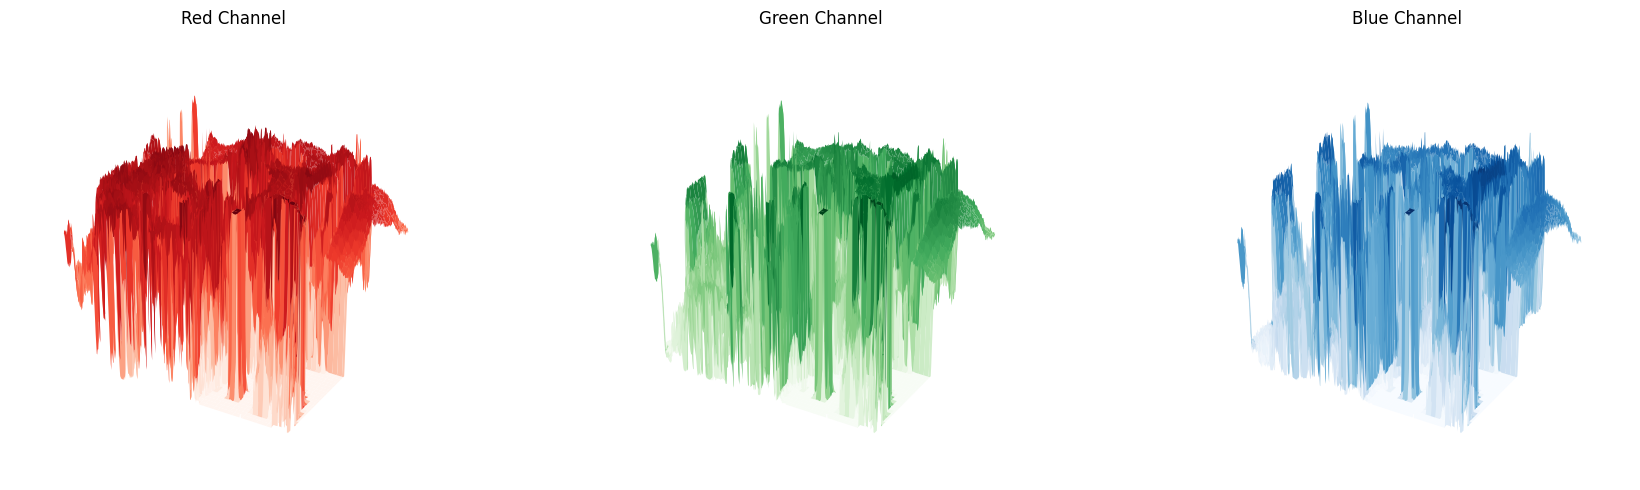

In [90]:
# 3. Plotting each color channel in a 1x3 subplot
# Adjusting the 3D plot section for correct execution

# Plotting each color channel in a 3D plot
fig = plt.figure(figsize=(18, 5))
colors = ['Red', 'Green', 'Blue']
cmaps = ['Reds', 'Greens', 'Blues']

for i, (color, cmap) in enumerate(zip(colors, cmaps), start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    
    # Extracting the specific color channel and using it as Z values for height
    Z = image[:, :, i-1] / 255.0  # Normalize the values to [0, 1] for consistent plotting
    
    # Plotting the surface
    ax.plot_surface(X, Y, np.flipud(Z), cmap=cmap, edgecolor='none')
    
    ax.set_title(f"{color} Channel")
    ax.axis('off')

plt.tight_layout()
plt.show()

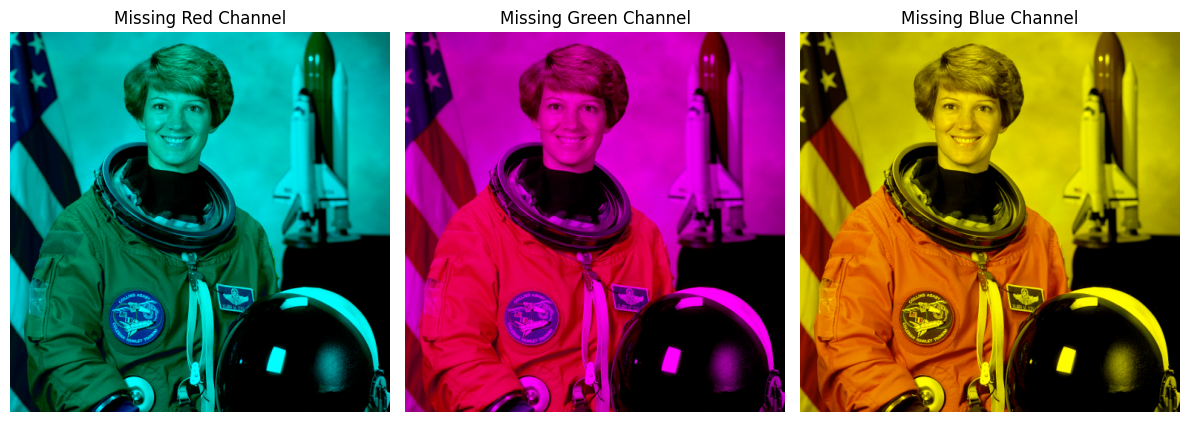

In [38]:
# Creating a 1-by-3 subplot where each subplot is missing one of the color channels (R, G, B)

plt.figure(figsize=(12, 5))
titles = ['Missing Red Channel', 'Missing Green Channel', 'Missing Blue Channel']

# Loop through each channel to zero it out and create a subplot
for i in range(3):
    modified_image = image.copy()
    modified_image[:, :, i] = 0  # Zero out the i-th channel
    plt.subplot(1, 3, i+1)
    plt.imshow(modified_image)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Farbkanäle Manipulieren

Um einen gewünschten Effekt zu erzeugen, können wir die Farbkanäle eines Bildes manipulieren. Zum Beispiel können wir die Farbkanäle eines Bildes vertauschen, um so ein neues Bild zu erzeugen.



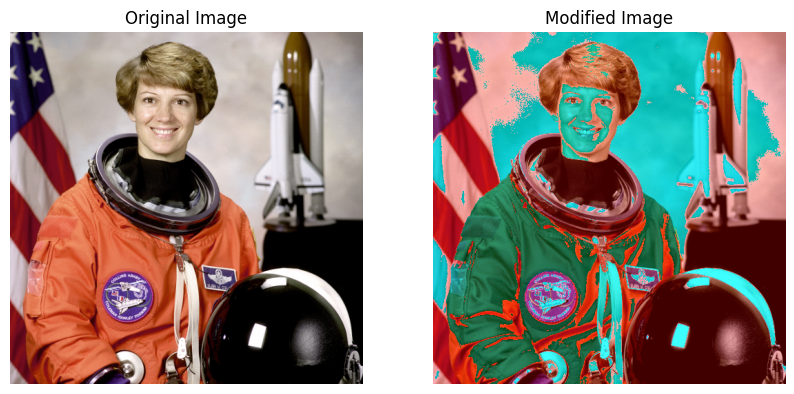

In [59]:
def apply_filter_to_channel(image, channel, filter_function):
    """
    Applies a user-defined filter function to a specific channel of an image.

    Parameters:
    - image: A 3D numpy array representing the RGB image.
    - channel: An integer representing the channel index (0 for Red, 1 for Green, 2 for Blue).
    - filter_function: A function that takes a 2D numpy array and returns a modified 2D numpy array.

    Returns:
    - modified_image: A 3D numpy array representing the modified RGB image.
    """
    # Ensure the input image is copied to avoid modifying the original image
    modified_image = image.copy()
    # Extract the specified channel
    channel_data = modified_image[:, :, channel]
    # Apply the filter function to the extracted channel
    modified_channel_data = filter_function(channel_data)
    # Ensure the modified channel data is within the valid range [0, 255]
    modified_channel_data = np.clip(modified_channel_data, 0, 255)
    # Update the image with the modified channel data
    modified_image[:, :, channel] = modified_channel_data.astype(np.uint8)

    return modified_image

# Example filter function that increases the intensity of the channel
def increase_intensity(channel_data, increase_value=30):
    return channel_data + increase_value


# Apply the example filter function to the Red channel of the image
modified_image = apply_filter_to_channel(image, 0, lambda x: increase_intensity(x, 64))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

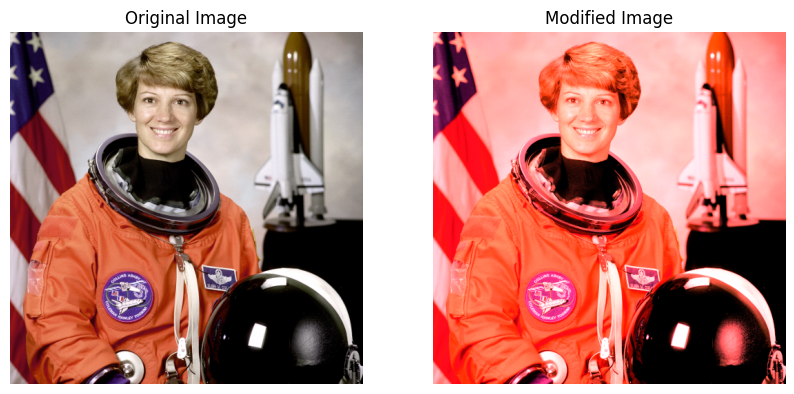

In [76]:
def apply_filter_to_channel_float(image, channel, filter_function):
    """
    Applies a user-defined filter function to a specific channel of a floating-point image.

    Parameters:
    - image: A 3D numpy array representing the RGB image in floating-point format.
    - channel: An integer representing the channel index (0 for Red, 1 for Green, 2 for Blue).
    - filter_function: A function that takes a 2D numpy array and returns a modified 2D numpy array.
                       This function should be designed to work with floating-point data.

    Returns:
    - modified_image: A 3D numpy array representing the modified RGB image in floating-point format.
    """
    # Ensure the input image is in floating-point format
    if image.dtype != np.float32 and image.dtype != np.float64:
        image = img_as_float(image)
    
    # Apply the filter function to the specified channel
    modified_channel = filter_function(image[:, :, channel])
    
    # Ensure the modified channel data is within the valid range [0, 1]
    modified_channel = np.clip(modified_channel, 0, 1)
    
    # Update the image with the modified channel data
    modified_image = image.copy()
    modified_image[:, :, channel] = modified_channel
    
    return modified_image


# function that increases the intensity of a channel by a certain percentage, ensuring no wrap-around
def increase_intensity_percentage(channel_data, increase_percentage):
    """
    Increases the intensity of a channel by a certain percentage, ensuring no wrap-around,
    with the data represented as float values in the range [0, 1].
    
    Parameters:
    - channel_data: A 2D numpy array representing the channel's pixel values.
    - increase_percentage: The percentage to increase each pixel's intensity by.
    
    Returns:
    - A 2D numpy array with the modified channel data.
    """
    # Convert the channel data to float values in the range [0, 1]
    float_channel_data = img_as_float(channel_data)
    
    # Calculate the increase based on the percentage
    increase_value = increase_percentage / 100.0
    
    # Apply the increase
    float_channel_data = float_channel_data * (1 + increase_value)

    
    # Ensure the values are within [0, 1] after the operation
    float_channel_data = np.clip(float_channel_data, 0, 1)
    
    return float_channel_data


# Apply the example filter function to the Red channel of the image
modified_image = apply_filter_to_channel_float(image, 0, lambda x: increase_intensity_percentage(x, 200))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

## Bildfilter

Was Sie gerade gesehen haben, ist bereits eine sehr einfache Form eines Bildfilters.

Eine der gebräuchlichsten Arten der Bildmanipulation ist die Verwendung von Bildfiltern. Ein Bildfilter ist eine Funktion, die auf jedes Pixel eines Bildes angewendet wird, um das Bild zu verändern.   
Wir haben bis jetzt nur die Farbkomponenten eines Bildes manipuliert. Es gibt jedoch viele andere Arten von Bildmanipulationen, die wir durchführen können, etwa mit der Kanteninformation, Geometrie, Schärfe, z.B.:

- **Kontrastfilter** Dieses Filter erhöht oder verringert den Kontrast des Bildes, also die Differenz zwischen den hellen und dunklen Bereichen des Bildes.
- **Gamma Korrektur** Dieses Filter erhöht oder verringert die Helligkeit des Bildes.
- **Sättigung** Dieses Filter erhöht oder verringert die Sättigung des Bildes, also die Intensität der Farben. Dies ist etwas aufwendiger, da es eine Umwandlung in einen anderen Farbraum erfordert.
- **Kantenerkennung** Dieses Filter erkennt Kanten im Bild und hebt sie hervor (z.B. Sobel-Filter).
- **Weichzeichner** Dieses Filter glättet das Bild und reduziert dadurch das Rauschen aber das Bild "verschwimmt" auch (z.B. Gauß-Filter).
- **Scharfzeichner** Dieses Filter erhöht den Kontrast an Kanten und hebt sie hervor, kann aber auch das Bildrauschen erhöhen (z.B. Laplace-Filter).
- **Negativfilter** Dieses Filter invertiert die Farben des Bildes. Das heisst aus weiss wird schwarz und umgekehrt. Genauer gesagt wird jedes Pixel durch 255 minus den aktuellen Wert ersetzt.
- **Schwellwertfilter** Dieses Filter ersetzt jedes Pixel durch weiss, wenn der Wert des Pixels grösser als ein Schwellwert ist, und durch schwarz, wenn der Wert des Pixels kleiner als der Schwellwert ist. Dieser Filter wird oft verwendet, um ein Graustufenbild in ein binäres Bild umzuwandeln (Für spätere Bildverarbeitungschritte wie Objekterkennung).

Dieses sind nur sehr einfache Beispiele. In der Praxis wird of eine Kombination aus diesen und komplexeren Verfahren Angewendet. 
Moderne Apps lokalisieren oft die Augen, Nase und Mund und wenden dann spezielle Filter auf diese Bereiche an. Dazu ist es notwendig Textur, Farbe und Geometrie zu analysieren, was wir heute nicht behandeln werden. Fall Sie daran interessiert sind, schauen Sie sich unseren Bachelor-  und Master-Studiengänge an 😉. 

Ein einfacher Bildfilter ist der Mittelwertfilter, der den Wert jedes Pixels durch den Mittelwert der Werte der umliegenden Pixel ersetzt. Ein anderer Bildfilter ist der Sobel-Filter, der verwendet wird, um Kanten in einem Bild zu erkennen. In diesem Notebook werden wir uns mit einigen Bildfiltern befassen und sehen, wie sie auf ein Bild angewendet werden können.

## Kontrastfilter

Wir wollen nun ein einfaches Kontrastfilter entwickeln, dass den Kontrast des Bildes erhöht oder verringert. Der Kontrast eines Bildes ist die Differenz zwischen den hellen und dunklen Bereichen des Bildes. Ein Bild mit hohem Kontrast hat sehr helle und sehr dunkle Bereiche, während ein Bild mit niedrigem Kontrast nur geringe Unterschiede zwischen hellen und dunklen Bereichen aufweist. Für diese Unterscheidung müssen wir einen Mittelpunkt definieren, der als Referenz für dunkle und helle Bereichne Dient. Im einfachsten Fall nehmen wir einfach den Mittelpunkt des Wertebereichs `[0..1] = 0.5`

Wollen wir Beispielsweise den Kontrast steigern, Berechnen wir den Mittelwert der Farben und subtrahieren diesen von jedem Pixel. Das Bild wird dadurch heller und die Farben intensiver.

 

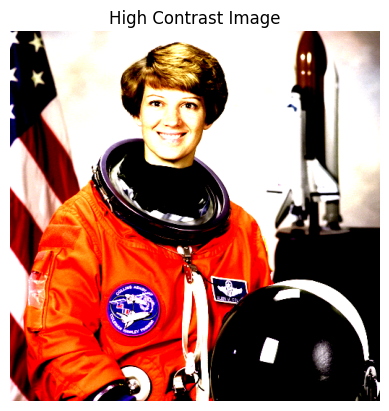

In [78]:
def apply_high_contrast(channel_data, contrast_factor=1.5):
    """
    Applies a high contrast filter to an image channel.
    
    Parameters:
    - channel_data: A 2D numpy array of the channel's pixel values in floating-point format.
    - contrast_factor: A factor by which to increase the contrast. >1 increases contrast,
                       <1 would decrease it, though typically, this function focuses on increasing.
    
    Returns:
    - A 2D numpy array with the high contrast filter applied.
    """
    # Ensure the channel data is in floating-point format
    if not np.issubdtype(channel_data.dtype, np.floating):
        channel_data = channel_data.astype(np.float32)
    
    # Apply the high contrast operation
    mid_point = 0.5
    # Subtracting mid_point, scaling by the contrast factor, adding mid_point back
    modified_channel = (channel_data - mid_point) * contrast_factor + mid_point
    
    # Clipping to ensure the values stay within [0, 1]
    modified_channel = np.clip(modified_channel, 0, 1)
    
    return modified_channel

# Example usage
# Load a sample image and convert it to floating-point format
image = img_as_float(data.astronaut())

# Apply the high contrast filter to the entire image
# Note: This applies the filter to all channels individually
for channel in range(3):
    image[:, :, channel] = apply_high_contrast(image[:, :, channel], contrast_factor=3)

# Display the modified image
plt.imshow(image)
plt.title('High Contrast Image')
plt.axis('off')
plt.show()